# 4/26: Plate 2

In [1]:
import os
import string
import numpy as np
import pandas as pd
from FlowCytometryTools import ThresholdGate, PolyGate
from matplotlib import pyplot as plt
from matplotlib import cm
from ckine.FCimports import importF

/usr/local/lib/python3.8/dist-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/usr/local/lib/python3.8/dist-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


In [2]:
path_ = os.path.abspath('')

In [3]:
sample1A, _ = importF("4-26", "2", "A", 1)
sample2B, _ = importF("4-26", "2", "B", 2)
sample3C, _ = importF("4-26", "2", "C", 3)

In [4]:
panel1 = sample1A.transform("tlog", channels=['VL6-H', 'VL4-H', 'BL1-H', 'VL1-H', 'BL3-H'])
panel2 = sample2B.transform("tlog", channels=['VL4-H', 'BL3-H'])
panel3 = sample3C.transform("tlog", channels=['VL6-H', 'VL4-H', 'BL3-H'])

/usr/local/lib/python3.8/dist-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  return where(x <= th, log10(th) * 1. * r / d, log10(x) * 1. * r / d)


## C) T helper and T regulatory cells

Percent gated as CD3+CD4+:  48.75620227279692 %


/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


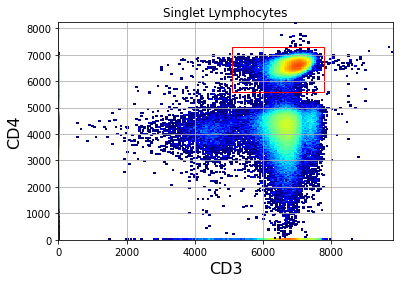

In [5]:
cd3cd4_gate = PolyGate([(5.1e03, 7.3e03), (5.1e03, 5.6e03), (7.8e03, 5.6e03), (7.8e03, 7.3e03)], ('VL4-H', 'VL6-H'), region='in', name='cd3cd4')
_ = panel1.plot(['VL4-H','VL6-H'], gates=cd3cd4_gate, gate_colors=['red'], cmap=cm.jet) #CD3, CD4
plt.title("Singlet Lymphocytes")
plt.xlabel("CD3")
plt.ylabel("CD4")
plt.grid()
print("Percent gated as CD3+CD4+: ", panel1.gate(cd3cd4_gate).counts/panel1.counts*100., "%")

Percent gated as T helper:  74.43630504097001 %
Percent gated as Treg:  5.265533753128464 %


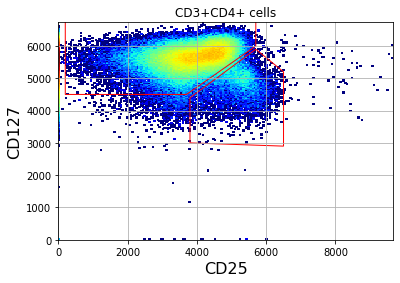

In [6]:
samplecd3cd4 = panel1.gate(cd3cd4_gate)
thelp_gate = PolyGate([(0.2e03, 6.8e03), (0.2e03, 4.5e03), (3.7e03, 4.5e03), (5.7e03, 6.0e03), (5.7e03, 6.8e03)], ('VL1-H', 'BL1-H'), region='in', name='thelp')
treg_gate = PolyGate([(3.8e03, 4.4e03), (3.8e03, 3.0e03), (6.5e03, 2.9e03), (6.5e03, 5.2e03), (5.7e03, 5.9e03)], ('VL1-H', 'BL1-H'), region='in', name='treg')
_ = samplecd3cd4.plot(['VL1-H','BL1-H'], gates=[thelp_gate,treg_gate], gate_colors=['red','red'], cmap=cm.jet) #CD3, CD4
plt.title("CD3+CD4+ cells")
plt.xlabel("CD25")
plt.ylabel("CD127")
plt.grid()
print("Percent gated as T helper: ", samplecd3cd4.gate(thelp_gate).counts/samplecd3cd4.counts*100., "%")
print("Percent gated as Treg: ", samplecd3cd4.gate(treg_gate).counts/samplecd3cd4.counts*100., "%")

In [7]:
samplethelp = samplecd3cd4.gate(thelp_gate)
sampletreg = samplecd3cd4.gate(treg_gate)

Percent gated as Memory T helper:  36.250652500997944 %
Percent gated as Naive T helper:  54.38250376147634 %


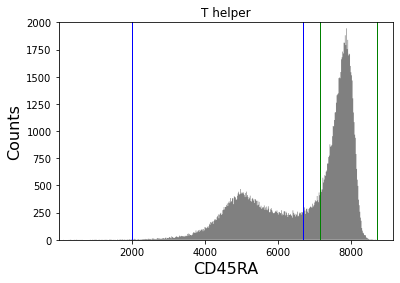

In [8]:
memthelpgate = ThresholdGate(6700.0, ['BL3-H'], region='below') & ThresholdGate(2000.0, ['BL3-H'], region='above')
naivethelpgate = ThresholdGate(7150.0, ['BL3-H'], region='above') & ThresholdGate(8700.0, ['BL3-H'], region='below')
_ = samplethelp.plot(['BL3-H'], gates=[memthelpgate,naivethelpgate], bins=500)
plt.xlabel("CD45RA")
plt.title("T helper")
plt.xlim(left=1)
plt.ylim(top=2000)
print("Percent gated as Memory T helper: ", samplethelp.gate(memthelpgate).counts/samplethelp.counts*100., "%")
print("Percent gated as Naive T helper: ", samplethelp.gate(naivethelpgate).counts/samplethelp.counts*100., "%")

Percent gated as Memory Treg:  59.73955507325014 %
Percent gated as Naive Treg:  25.00271296798698 %


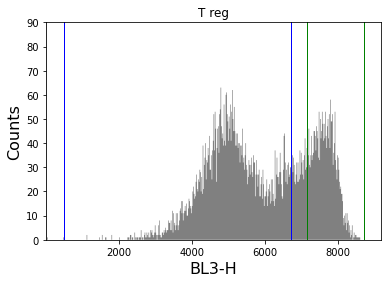

In [9]:
memtreggate = ThresholdGate(6700.0, ['BL3-H'], region='below') & ThresholdGate(500.0, ['BL3-H'], region='above')
naivetreggate = ThresholdGate(7150.0, ['BL3-H'], region='above') & ThresholdGate(8700.0, ['BL3-H'], region='below')
_ = sampletreg.plot(['BL3-H'],gates=[memtreggate,naivetreggate], bins=500)
plt.title("T reg")
plt.xlim(left=1)
plt.ylim(top=90)
print("Percent gated as Memory Treg: ", sampletreg.gate(memtreggate).counts/sampletreg.counts*100., "%")
print("Percent gated as Naive Treg: ", sampletreg.gate(naivetreggate).counts/sampletreg.counts*100., "%")

## D) NK Cells

Percent gated as NK:  4.55163886687608 %
Percent gated as NKT:  3.699504473108835 %


/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


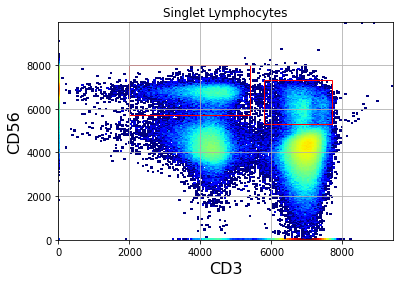

In [10]:
nk_gate = PolyGate([(2.0e3, 5.7e3), (5.4e3, 5.7e3), (5.4e3, 8.0e3), (2.0e3, 8.0e3)], ('VL4-H', 'BL3-H'), region='in', name='nk')
nkt_gate = PolyGate([(5.8e3, 5.3e3), (7.7e3, 5.3e3), (7.7e3, 7.3e3), (5.8e3, 7.3e3)], ('VL4-H', 'BL3-H'), region='in', name='nkt')
_ = panel2.plot(['VL4-H', 'BL3-H'], gates=[nk_gate,nkt_gate], gate_colors=['red','red'], cmap=cm.jet) #CD56 vs. CD3
samplenk = panel2.gate(nk_gate)
samplenkt = panel2.gate(nkt_gate)
print("Percent gated as NK: ", samplenk.counts/panel2.counts*100., "%")
print("Percent gated as NKT: ", samplenkt.counts/panel2.counts*100., "%")
plt.title("Singlet Lymphocytes")
plt.xlabel("CD3")
plt.ylabel("CD56")
plt.grid()

## E) CD8+ T cells

Percent gated as CD3+CD8+:  20.952726041672175 %


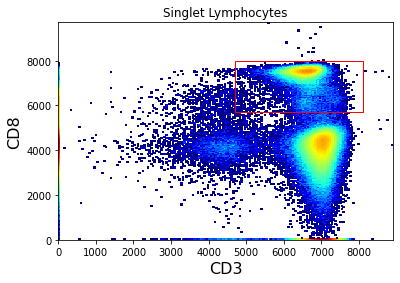

In [11]:
cd8_gate = PolyGate([(4.7e3, 5.7e3), (8.1e3, 5.7e3), (8.1e3, 8.0e3), (4.7e3, 8.0e3)], ('VL4-H', 'VL6-H'), region='in', name='cd8')
_ = panel3.plot(['VL4-H', 'VL6-H'], gates=cd8_gate, gate_colors=['red'], cmap=cm.jet) #CD8 vs. CD3
plt.title("Singlet Lymphocytes")
plt.xlabel("CD3")
plt.ylabel("CD8")
print("Percent gated as CD3+CD8+: ", panel3.gate(cd8_gate).counts/panel3.counts*100., "%")

Percent gated as Cytotoxic Memory:  39.92501988109213 %
Percent gated as Cytotoxic Naive:  45.7467085747466 %


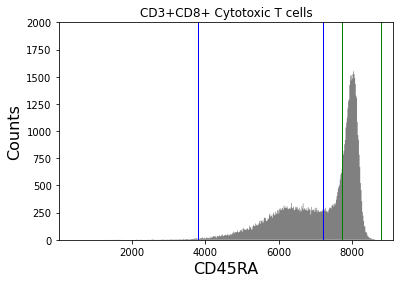

In [12]:
cd3cd8sample = panel3.gate(cd8_gate)
memcd3cd8gate = ThresholdGate(3800.0, ['BL3-H'], region='above') & ThresholdGate(7200.0, ['BL3-H'], region='below')
naivecd3cd8gate = ThresholdGate(7720.0, ['BL3-H'], region='above') & ThresholdGate(8800.0, ['BL3-H'], region='below')
_ = cd3cd8sample.plot(['BL3-H'], gates=[memcd3cd8gate,naivecd3cd8gate], bins=500)
plt.xlabel("CD45RA")
plt.title("CD3+CD8+ Cytotoxic T cells")
plt.xlim(left=1)
plt.ylim(top=2000)
print("Percent gated as Cytotoxic Memory: ", cd3cd8sample.gate(memcd3cd8gate).counts/cd3cd8sample.counts*100., "%")
print("Percent gated as Cytotoxic Naive: ", cd3cd8sample.gate(naivecd3cd8gate).counts/cd3cd8sample.counts*100., "%")